In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv( 'https://raw.githubusercontent.com/Trabalhinho/FIAP_Modulo_2/main/Base_de_dados/airlines.csv', sep = ',' )
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [ ]:
df.shape

(539382, 8)

In [ ]:
df.describe()

,Flight,Time,Length,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


In [ ]:
df.isnull().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [ ]:
duplicated_cols = []
for col in df.columns:
  if df[col].duplicated().any():
    duplicated_cols.append(col)
print(duplicated_cols)

['Flight', 'Time', 'Length', 'Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Class']


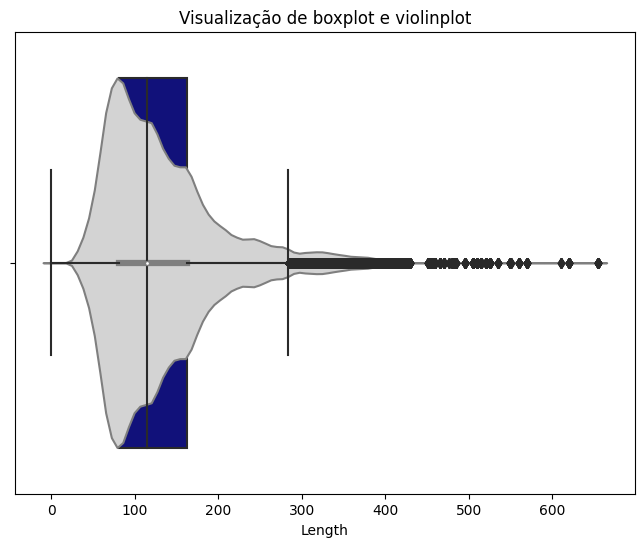

In [ ]:
fig, ax = plt.subplots( figsize = (8,6) )

sns.violinplot( x = 'Length', data = df, ax = ax, color = 'lightgray' )

sns.boxplot( x = 'Length', data = df, ax = ax, whis = 1.5, color = 'darkblue' )

ax.set_title( 'Visualização de boxplot e violinplot' )

plt.show()

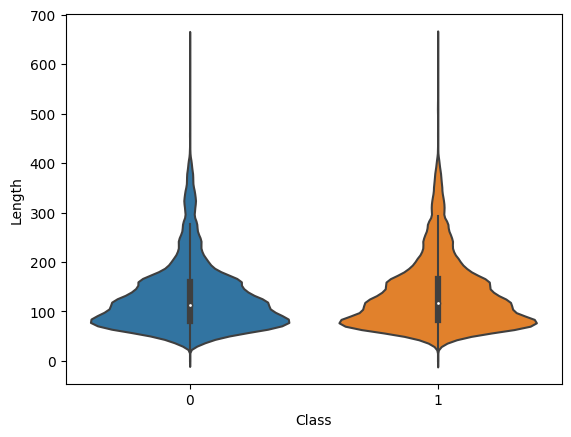

In [ ]:
sns.violinplot( x = 'Class', y = 'Length', data = df )
plt.show()

In [ ]:
atraso_voo = df.groupby('Class')
atraso_voo.describe().T

Class                        0              1
Flight    count  299118.000000  240264.000000
          mean     2513.484842    2321.413508
          std      2102.883185    2017.368082
          min         1.000000       1.000000
          25%       725.000000     701.000000
          50%      1924.000000    1695.000000
          75%      3931.000000    3408.000000
          max      7812.000000    7814.000000
Time      count  299118.000000  240264.000000
          mean      765.235138     849.405308
          std       283.712464     263.472137
          min        10.000000      10.000000
          25%       515.000000     640.000000
          50%       735.000000     860.000000
          75%       998.000000    1060.000000
          max      1439.000000    1439.000000
Length    count  299118.000000  240264.000000
          mean      129.657760     135.369697
          std        68.693953      71.723475
          min         0.000000       0.000000
          25%        81.000000      82.000000
          50%       114.000000     118.000000
          75%       159.000000     166.000000
          max       655.000000     655.000000
DayOfWeek count  299118.000000  240264.000000
          mean        3.974622       3.873697
          std         1.907565       1.922004
          min         1.000000       1.000000
          25%         2.000000       2.000000
          50%         4.000000       4.000000
          75%         5.000000       5.000000
          max         7.000000       7.000000

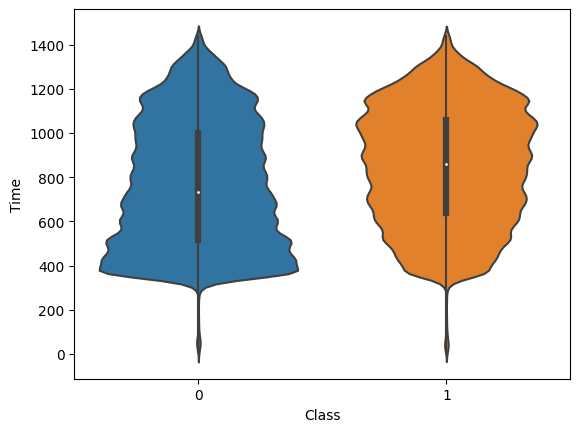

In [ ]:
sns.violinplot( x = 'Class', y = 'Time', data = df )
plt.show()

<Axes: xlabel='Airline', ylabel='count'>

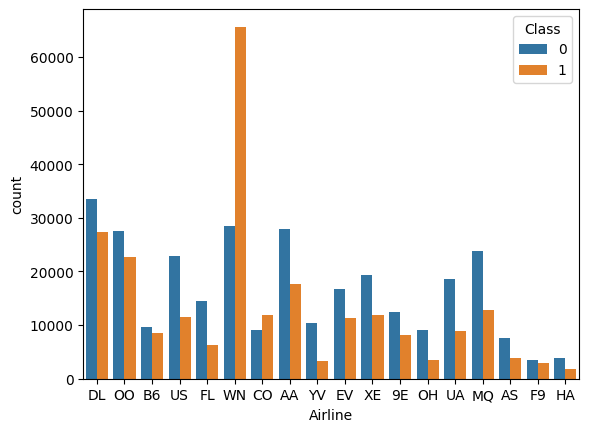

In [ ]:
sns.countplot( x = 'Airline', hue = 'Class', data = df )

<Axes: xlabel='DayOfWeek', ylabel='count'>

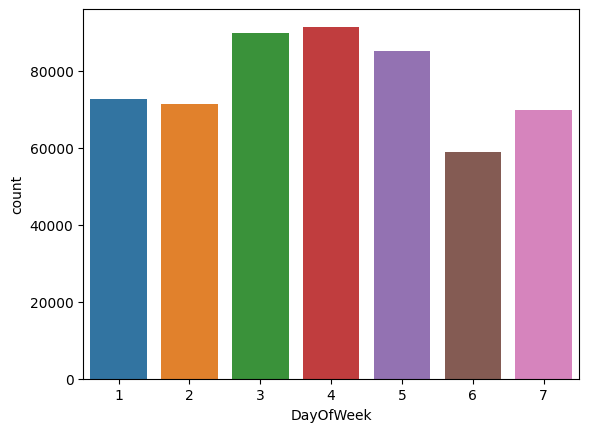

In [ ]:
diaSemana = list( range(1,8) )
sns.countplot( x = 'DayOfWeek', data = df, order = diaSemana )

<Axes: xlabel='Class', ylabel='count'>

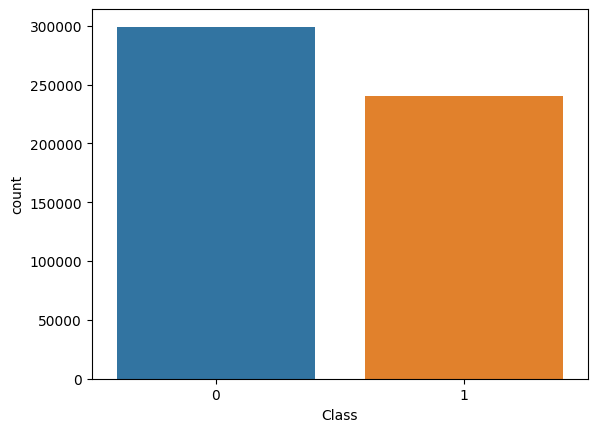

In [ ]:
sns.countplot( x = 'Class', data = df )

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df['AirportFrom'] = LabelEncoder().fit_transform( df['AirportFrom'] )
df['AirportTo'] = LabelEncoder().fit_transform( df['AirportTo'] )

In [ ]:
df['Airline'] = LabelEncoder().fit_transform( df['Airline'] )

In [ ]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,5,16,129,1,0
1,6948.0,360.0,146.0,12,65,208,4,0
2,1247.0,1170.0,143.0,3,35,60,3,0
3,31.0,1410.0,344.0,14,203,217,6,0
4,563.0,692.0,98.0,8,32,16,4,0


###Separando a base de dados

In [ ]:
x = df[ ['Flight', 'Time',	'Length',	'Airline',	'AirportFrom',	'AirportTo',	'DayOfWeek' ] ]
y = df['Class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3, random_state = 7 )

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score( y_test, y_pred )
print( 'Accuracy: ', round(accuracy, 2) )

Accuracy:  0.59


In [ ]:
from sklearn.utils import resample

In [ ]:
df_majority = df[ df.Class == 0 ]
df_minority = df[ df.Class == 1 ]

In [ ]:
df_minority_upsampled = resample( df_minority, replace = True, n_samples = len(df_majority), random_state = 7 )

In [ ]:
df_equilibrado = pd.concat( [df_majority, df_minority_upsampled] )

<Axes: xlabel='Class', ylabel='count'>

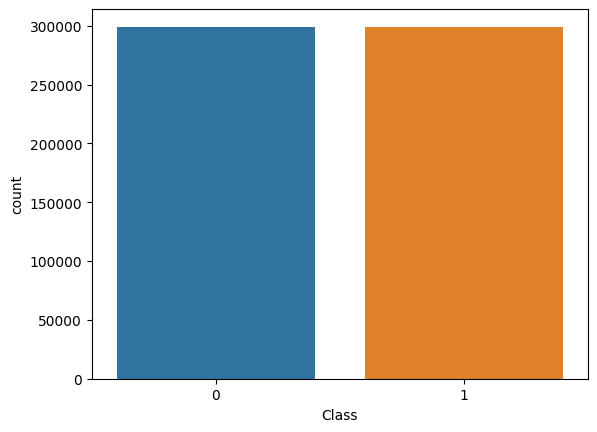

In [ ]:
sns.countplot( x = 'Class', data = df_equilibrado )

In [ ]:
x_equilibrado = df_equilibrado[ ['Flight', 'Time', 'Length', 'DayOfWeek'] ]
y_equilibrado = df_equilibrado['Class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x_equilibrado, y_equilibrado, test_size = 0.3, stratify = y_equilibrado, random_state = 7 )

In [ ]:
gnb_equilibrado = GaussianNB()
gnb_equilibrado.fit( x_train, y_train )

GaussianNB()

In [ ]:
y_pred_gnb_equilibrado = gnb_equilibrado.predict( x_test )

In [ ]:
accuracy_equilibrado = accuracy_score( y_test, y_pred_gnb_equilibrado )
print( 'Accuracy: ', round(accuracy_equilibrado, 2) )

Accuracy:  0.57


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x_equilibrado, y_equilibrado, test_size = 0.3, random_state = 7 )

In [ ]:
rf = RandomForestClassifier( random_state = 7 )

In [ ]:
rf.fit( x_train, y_train )

RandomForestClassifier(random_state=7)

In [ ]:
y_pred_rf = rf.predict( x_test )

In [ ]:
accuracy_equilibrado_rf = accuracy_score( y_test, y_pred_rf )
print( 'Accuracy: ', round(accuracy_equilibrado_rf, 2) )

Accuracy:  0.69
